# Example Anderson paper



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

X = np.array([[4.91, 2.16], [6.05, 5.54], [3.48, 1.35], [8.09, 0.18], [2.53, 3.49],
             [1.62, 2.46], [8.37, 2.29], [3.17, 6.27], [6.02, 4.51], [8.50, 4.65],
             [4.21, 5.93], [0.15, 5.99], [9.31, 3.77], [4.10, 0.45], [5.83, 2.42],
             [6.00, 0.27], [3.30, 8.93], [4.38, 7.81], [4.93, 6.64], [1.22, 1.54]])

[N, cols] = X.shape

# cutting functions along the X axis (vertical, 0) or the Y axis (horizontal, 1)
H = np.array([1,1,0,1,1,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1])
# H = np.array([0,1,0,1,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0])
print(H)

# define the permutaions 
K = np.array([10, 5, 15, 3, 7, 12, 18, 2, 4, 6, 8, 11, 13, 16, 19, 1, 9, 14, 17, 20])
# K = np.array([10, 5, 15, 3, 7, 12, 18, 2, 4, 6, 8, 11, 13, 16, 19, 1, 9, 14, 17, 20])
print(K)

[1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1]
[10  5 15  3  7 12 18  2  4  6  8 11 13 16 19  1  9 14 17 20]


In [2]:
import pdb
import os
import pandas as pd
import numpy as np
from itertools import chain
#path = '/media/sf_Documents/Personal/Research/Statistical equivalent block-order'
#os.chdir(path)
#data =pd.read_csv(os.path.abspath('/content/drive/My Drive/Statistical equivalent block-order/Data/Anderson_paper_data.csv'), sep = ';', decimal = '.')
data_x = pd.DataFrame(X)#data.iloc[:,0:2]#
data_x.columns = ['x_1', 'x_2']
#data_y = data.iloc[:,2:4]
[rows, cols] = X.shape#data_x.shape#

In [3]:
class block():
    def __init__(self, 
                 vertices = None, 
                 elements = None, 
                 stats = None, 
                 parent = None, 
                 leftChild = None, 
                 rightChild = None,
                 prefChild = None):
        self.vertices = vertices   # array with 2 bidimensional elemntes, corresponding to the vertices of the block
                                   # vertices must be ordered starting from the left bottom vertix and finishing with the
                                   # right top vertix
                                   # the array must have two rows and two columns (bidimensional case)
        self.elements = elements   # array with the points that belong to the block. Each row contains an element and each
                                   # column is a dimension (in this case, bidimensional)
        self.stats = np.sort(stats) # array with index of blocks
        self.parent = parent       # parent of the block
        self.leftChild = leftChild
        self.rightChild = rightChild
        self.prefChild = prefChild
    
    def plot(self, color = 'C0', lw = 1, size = 12, print_num = True):
        plt.plot(self.vertices[:,0], np.ones(2)*self.vertices[0,1], color = color, lw = lw)
        plt.plot(np.ones(2)*self.vertices[1,0], self.vertices[:,1], color = color, lw = lw)
        plt.plot(self.vertices[:,0], np.ones(2)*self.vertices[1,1], color = color, lw = lw)
        plt.plot(np.ones(2)*self.vertices[0,0], self.vertices[:,1], color = color, lw = lw)
        xplot = (self.vertices[0,0]+self.vertices[1,0])/2
        yplot = (self.vertices[0,1]+self.vertices[1,1])/2
        if self.stats.size == 1 and print_num:
            plt.text(xplot, yplot, str(self.stats[0]), fontsize = size)

        
    def split(self, axis, korder):
        """
        This method split a Block and creates two child blocks, making the partirion 
        on the korder th statistic
        axis: indicates wheter it is along 
              the X axis (vertical, 0) or 
              the Y axis (horizontal, 1)
        korder: is the order statistic to make the partition
        """
        # select the dimension to sort
        Xele = self.elements[:,axis]
        # select the kth order statistic
        Xorder = np.sort(Xele)
        minStat = min(self.stats)
        korder = korder - minStat
        xstat = Xorder[korder]
        # divide the stats
        statsL = self.stats[:korder+1]
        statsR = self.stats[korder+1:]
        # create the elements and vertices of each block
        Relements = np.empty((0, 2))
        Lelements = np.empty((0, 2))
        
        # add elements to vertices and elements for each case
        if axis == 0:
            Lvertices = np.array([self.vertices[0,:], [xstat, self.vertices[1,1]]])
            Rvertices = np.array([[xstat, self.vertices[0,1]], self.vertices[1,:]])
            # now we move on the elements of the parent block and select wich ones 
            # go to the left and right child
            for l in range(self.elements.shape[0]):
                if Xele[l] < xstat:
                    Lelements = np.append(Lelements, [self.elements[l, :]], axis = 0)   # add the new element as a row
                elif Xele[l] > xstat:
                    Relements = np.append(Relements, [self.elements[l, :]], axis = 0)   # add the new element as a row
                else:
                    Pchild =  [self.elements[l, :]]  # choosen k-th order 
        elif axis == 1:
            Lvertices = np.array([self.vertices[0,:], [self.vertices[1,0], xstat]])
            Rvertices = np.array([[self.vertices[0,0], xstat],self.vertices[1,:]])
            # now we move on the elements of the parent block and select wich ones go to the left and right child
            for l in range(self.elements.shape[0]):
                if Xele[l] < xstat:
                    Lelements = np.append(Lelements, [self.elements[l, :]], axis = 0)   # add the new element as a row
                elif Xele[l] > xstat:
                    Relements = np.append(Relements, [self.elements[l, :]], axis = 0)   # add the new element as a row
                else:
                    Pchild =  [self.elements[l, :]]  # choosen k-th order 
                
        # create the childs of the block
        Rchild = block(vertices = Rvertices, 
                       elements = Relements, 
                       stats = statsR, 
                       parent = self)  
        # right side or up side (the greaters elements)
        Lchild = block(vertices = Lvertices, 
                       elements = Lelements, 
                       stats = statsL, 
                       parent = self)   
        # left side or down side (the smaller elements)
        
        # asociate the childs to the parten
        self.rightChild = Rchild
        self.leftChild = Lchild
        self.prefChild = Pchild
        # return the place where the partition was made
        return xstat

Point [array([4.38, 7.81])] was selection 1 in iteration 1
Point [array([2.53, 3.49])] was selection 2 in iteration 2
Point [array([5.83, 2.42])] was selection 3 in iteration 3
Point [array([3.48, 1.35])] was selection 4 in iteration 4
Point [array([3.17, 6.27])] was selection 5 in iteration 5
Point [array([6.  , 0.27])] was selection 6 in iteration 6
Point [array([6.05, 5.54])] was selection 7 in iteration 7
Point [array([1.62, 2.46])] was selection 8 in iteration 8
Point [array([4.1 , 0.45])] was selection 9 in iteration 9
Point [array([0.15, 5.99])] was selection 10 in iteration 10
Point [array([4.21, 5.93])] was selection 11 in iteration 11
Point [array([4.91, 2.16])] was selection 12 in iteration 12
Point [array([8.09, 0.18])] was selection 13 in iteration 13
Point [array([4.93, 6.64])] was selection 14 in iteration 14
Point [array([8.5 , 4.65])] was selection 15 in iteration 15
Point [array([1.22, 1.54])] was selection 16 in iteration 16
Point [array([3.3 , 8.93])] was selection 

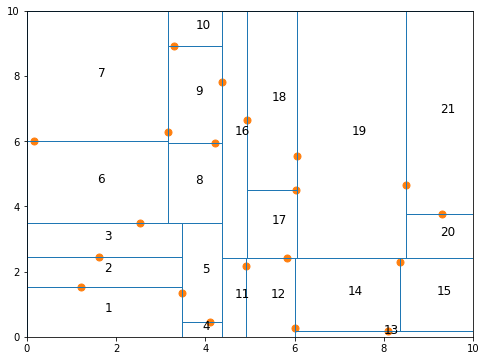

In [4]:
# create list with blocks
First_Block = block(vertices = np.array([[0,0],[10,10]]), 
                    elements = X, 
                    stats = range(1,N+2))

Blocks_List = [First_Block]

for i in range(N):
    # search the last block that has the K[i] stat
    for j in range(len(Blocks_List)):
        if (K[i] in Blocks_List[j].stats and Blocks_List[j].leftChild == None):
            Blocks_List[j].split(axis = H[K[i]-1], korder = K[i])
            Blocks_List.extend([Blocks_List[j].leftChild, Blocks_List[j].rightChild])            
            break

# plot
fig = plt.figure(figsize=(8,6))
plt.plot(X[:,0], X[:,1], 'o', color = 'C1', ms = 7)

plt.xlim(0,10)
plt.ylim(0,10)
block_ref = list()
for j in range(len(Blocks_List)):
    if Blocks_List[j].leftChild == None:
        Blocks_List[j].plot()
        block_ref.append(Blocks_List[j].stats)

# Defining the selection list
cont = 1
for i in range(len(Blocks_List)):
  if Blocks_List[i].prefChild != None:
    print('Point', Blocks_List[i].prefChild, 'was selection', cont, 'in iteration', i+1)
    cont += 1


# Bisection Method for a sample of size 15


Point [array([4.93, 6.64])] was selection 1 in iteration 1
Point [array([4.21, 5.93])] was selection 2 in iteration 2
Point [array([9.31, 3.77])] was selection 3 in iteration 3
Point [array([3.48, 1.35])] was selection 4 in iteration 4
Point [array([3.17, 6.27])] was selection 5 in iteration 5
Point [array([6.  , 0.27])] was selection 6 in iteration 6
Point [array([6.05, 5.54])] was selection 7 in iteration 7
Point [array([2.53, 3.49])] was selection 8 in iteration 8
Point [array([4.91, 2.16])] was selection 9 in iteration 9
Point [array([0.15, 5.99])] was selection 10 in iteration 10
Point [array([4.38, 7.81])] was selection 11 in iteration 11
Point [array([5.83, 2.42])] was selection 12 in iteration 12
Point [array([8.37, 2.29])] was selection 13 in iteration 13
Point [array([6.02, 4.51])] was selection 14 in iteration 14
Point [array([8.5 , 4.65])] was selection 15 in iteration 15


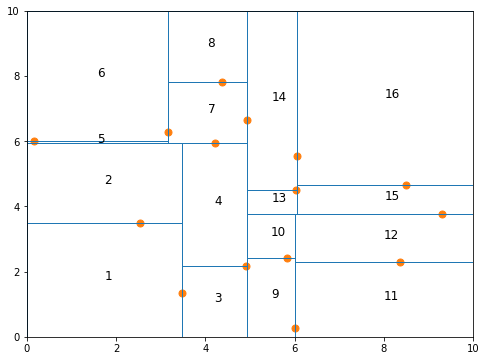

In [5]:
rnd.seed(9)
new_X = X[np.random.choice(len(X),15,replace=False)]
[N, cols] = new_X.shape

# cutting functions along the X axis (vertical, 0) or the Y axis (horizontal, 1)
H = np.array([1,0,1,1,1,0,1,0,1,0,1,1,1,0,1])

# define the permutaions 
K = np.array([8,4,12,2,6,10,14,1,3,5,7,9,11,13,15])

# create list with blocks
First_Block = block(vertices = np.array([[0,0],[10,10]]), 
                    elements = new_X, 
                    stats = range(1,N+2))

Blocks_List = [First_Block]

for i in range(N):
    # search the last block that has the K[i] stat
    for j in range(len(Blocks_List)):
        if (K[i] in Blocks_List[j].stats and Blocks_List[j].leftChild == None):
            Blocks_List[j].split(axis = H[K[i]-1], korder = K[i])
            Blocks_List.extend([Blocks_List[j].leftChild, Blocks_List[j].rightChild])            
            break

# plot
fig = plt.figure(figsize=(8,6))
plt.plot(new_X[:,0], new_X[:,1], 'o', color = 'C1', ms = 7)

plt.xlim(0,10)
plt.ylim(0,10)
block_ref = list()
for j in range(len(Blocks_List)):
    if Blocks_List[j].leftChild == None:
        Blocks_List[j].plot()
        block_ref.append(Blocks_List[j].stats)

# Defining the selection list
cont = 1
for i in range(len(Blocks_List)):
  if Blocks_List[i].prefChild != None:
    print('Point', Blocks_List[i].prefChild, 'was selection', cont, 'in iteration', i+1)
    cont += 1


# Results in a Uniform Bivariate Sample

In [8]:
rnd.seed(9)
N = 30
X = np.empty((N,2))
X[:,0] = np.random.uniform(0,10,N)
X[:,1] = np.random.uniform(0,10,N)
# each function is arbitrary and takes one of the components of the corresponding (x1, x2)
# H = np.array([1,1,0,1,1,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1])
H = np.random.randint(0, 2, N)

# define the permutaions (arbitrary)
# K = np.array([10, 5, 15, 3, 7, 12, 18, 2, 4, 6, 8, 11, 13, 16, 19, 1, 9, 14, 17, 20])
K = np.arange(1,N+1)
np.random.shuffle(K)

# we are going to order K and H in a diadic way
new_K = []
new_H = H
k_first = list(K)
k_first.sort()   # sort the list
K_List = [k_first]
K_marker = [0]  # index that says if the corresponding K_List has been partitioned or not

H_counter = []   # counter to asign values of H
h = 0
while sum(H_counter) <= len(new_H):
    H_counter.append(2**h)
    h = h+1
    
H_value = [0]*len(H_counter)    # values of H to asign
for i in range(len(H_value)):
    if i%2 == 1:
        H_value[i] = 1

for i in range(N):
    # choose list to divide
    for j in range(len(K_List)):
        if K_marker[j] == 0 and len(K_List[j]) >= 1:
            length_K = len(K_List[j])
            # choose position of new_K in the list
            K_position = (length_K+1)//2 - 1   # the middle (even) or the first integer greater than the middle (odd)
            new_K.append(K_List[j][K_position])
            # split the existing array            
            K_List.append(K_List[j][:K_position])
            K_List.append(K_List[j][K_position+1:])
            K_marker[j] = 1
            K_marker.append(0)
            K_marker.append(0)
            break
print(H_value, H_counter)
# for each element in K, asign the corresponding element in H

for i in range(N):
    for m in range(len(H_value)):
        if i+1 <= sum(H_counter[:m+1]):
            new_H[new_K[i]-1] = H_value[m]
            break
    
H = np.array(new_H)
K = np.array(new_K)
#np.random.shuffle(H)
#np.random.shuffle(K)
print(H[K-1])
print(K)

[0, 1, 0, 1, 0] [1, 2, 4, 8, 16]
[0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[15  7 23  3 11 19 27  1  5  9 13 17 21 25 29  2  4  6  8 10 12 14 16 18
 20 22 24 26 28 30]


Point [array([4.65535248, 1.4420869 ])] was selection 1 in iteration 1
Point [array([1.52581453, 3.74086526])] was selection 2 in iteration 2
Point [array([9.04721094, 4.57283984])] was selection 3 in iteration 3
Point [array([1.62604023, 0.673751  ])] was selection 4 in iteration 4
Point [array([1.75893139, 6.78881997])] was selection 5 in iteration 5
Point [array([7.05969217, 2.91666015])] was selection 6 in iteration 6
Point [array([8.33246077, 8.48454409])] was selection 7 in iteration 7
Point [array([0.86121533, 0.0610198 ])] was selection 8 in iteration 8
Point [array([2.72846128, 1.71470754])] was selection 9 in iteration 9
Point [array([0.95402869, 5.09750027])] was selection 10 in iteration 10
Point [array([3.02770174, 6.50152256])] was selection 11 in iteration 11
Point [array([5.96952526, 2.24447401])] was selection 12 in iteration 12
Point [array([9.41660451, 4.30434213])] was selection 13 in iteration 13
Point [array([6.17431859, 7.28597302])] was selection 14 in iteration

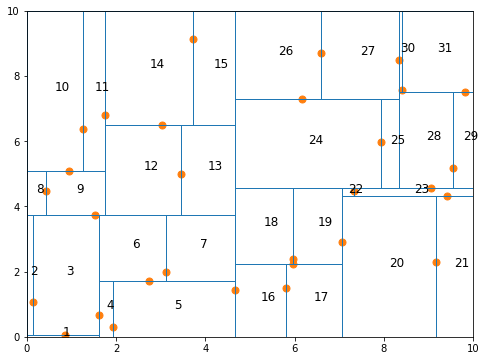

In [9]:

# create list with blocks
First_Block = block(vertices = np.array([[0,0],[10,10]]), 
                    elements = X, 
                    stats = range(1,N+2))

Blocks_List = [First_Block]

for i in range(N):
    # search the last block that has the K[i] stat
    for j in range(len(Blocks_List)):
        if (K[i] in Blocks_List[j].stats and Blocks_List[j].leftChild == None):
            Blocks_List[j].split(axis = H[K[i]-1], korder = K[i])
            Blocks_List.extend([Blocks_List[j].leftChild, Blocks_List[j].rightChild])            
            break

# plot
fig = plt.figure(figsize=(8,6))
plt.plot(X[:,0], X[:,1], 'o', color = 'C1', ms = 7)

plt.xlim(0,10)
plt.ylim(0,10)
block_ref = list()
for j in range(len(Blocks_List)):
    if Blocks_List[j].leftChild == None:
        Blocks_List[j].plot(print_num = True)

# Defining the selection list
cont = 1
for i in range(len(Blocks_List)):
  if Blocks_List[i].prefChild != None:
    print('Point', Blocks_List[i].prefChild, 'was selection', cont, 'in iteration', i+1)
    cont += 1

# Results in a Bivariate Elliptical Distribution

In [10]:
mean = np.array([0,0])
cov = np.array([[10,0.6],[0.6,10]])
N = 30
X = np.random.multivariate_normal(mean, cov, N)

lim_inf = np.floor(X.min(axis=0)-X.std(axis=0))[0]
lim_max = np.ceil(X.max(axis=0)+X.std(axis=0))[0]

# each function is arbitrary and takes one of the components of the corresponding (x1, x2)
# H = np.array([1,1,0,1,1,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1])
H = np.random.randint(0, 2, N)

# define the permutaions (arbitrary)
# K = np.array([10, 5, 15, 3, 7, 12, 18, 2, 4, 6, 8, 11, 13, 16, 19, 1, 9, 14, 17, 20])
K = np.arange(1,N+1)
np.random.shuffle(K)

# we are going to order K and H in a diadic way
new_K = []
new_H = H
k_first = list(K)
k_first.sort()   # sort the list
K_List = [k_first]
K_marker = [0]  # index that says if the corresponding K_List has been partitioned or not

H_counter = []   # counter to asign values of H
h = 0
while sum(H_counter) <= len(new_H):
    H_counter.append(2**h)
    h = h+1
    
H_value = [0]*len(H_counter)    # values of H to asign
for i in range(len(H_value)):
    if i%2 == 1:
        H_value[i] = 1

for i in range(N):
    # choose list to divide
    for j in range(len(K_List)):
        if K_marker[j] == 0 and len(K_List[j]) >= 1:
            length_K = len(K_List[j])
            # choose position of new_K in the list
            K_position = (length_K+1)//2 - 1   # the middle (even) or the first integer greater than the middle (odd)
            new_K.append(K_List[j][K_position])
            # split the existing array            
            K_List.append(K_List[j][:K_position])
            K_List.append(K_List[j][K_position+1:])
            K_marker[j] = 1
            K_marker.append(0)
            K_marker.append(0)
            break
print(H_value, H_counter)
# for each element in K, asign the corresponding element in H

for i in range(N):
    for m in range(len(H_value)):
        if i+1 <= sum(H_counter[:m+1]):
            new_H[new_K[i]-1] = H_value[m]
            break
    
H = np.array(new_H)
K = np.array(new_K)
#np.random.shuffle(H)
#np.random.shuffle(K)
print(H[K-1])
print(K)

[0, 1, 0, 1, 0] [1, 2, 4, 8, 16]
[0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[15  7 23  3 11 19 27  1  5  9 13 17 21 25 29  2  4  6  8 10 12 14 16 18
 20 22 24 26 28 30]


Point [array([-1.38458175, -2.53817421])] was selection 1 in iteration 1
Point [array([-3.25211682, -1.60776702])] was selection 2 in iteration 2
Point [array([1.90747719, 1.03915884])] was selection 3 in iteration 3
Point [array([-2.75368166, -4.72059876])] was selection 4 in iteration 4
Point [array([-2.68415684,  3.88187171])] was selection 5 in iteration 5
Point [array([-0.4976996 , -6.87103461])] was selection 6 in iteration 6
Point [array([2.63547557, 5.15733323])] was selection 7 in iteration 7
Point [array([-2.7654196 , -2.42333999])] was selection 8 in iteration 8
Point [array([-1.39203734, -3.09399007])] was selection 9 in iteration 9
Point [array([-7.73359821,  2.65772966])] was selection 10 in iteration 10
Point [array([-1.91075955,  0.74529285])] was selection 11 in iteration 11
Point [array([-0.72638866, -0.58748218])] was selection 12 in iteration 12
Point [array([ 3.80150726, -3.39064996])] was selection 13 in iteration 13
Point [array([1.62485545, 3.75542518])] was sel

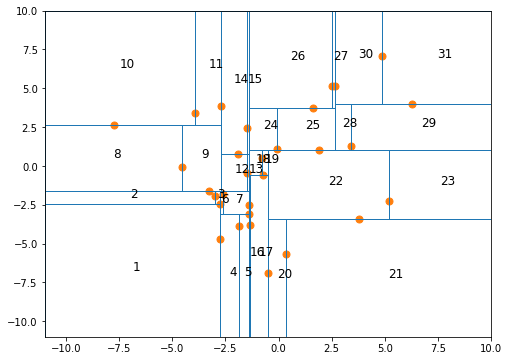

In [11]:
# create list with blocks
First_Block = block(vertices = np.array([[lim_inf,lim_inf],[lim_max,lim_max]]), 
                    elements = X, 
                    stats = range(1,N+2))

Blocks_List = [First_Block]

for i in range(N):
    # search the last block that has the K[i] stat
    for j in range(len(Blocks_List)):
        if (K[i] in Blocks_List[j].stats and Blocks_List[j].leftChild == None):
            Blocks_List[j].split(axis = H[K[i]-1], korder = K[i])
            Blocks_List.extend([Blocks_List[j].leftChild, Blocks_List[j].rightChild])            
            break

# plot
fig = plt.figure(figsize=(8,6))
plt.plot(X[:,0], X[:,1], 'o', color = 'C1', ms = 7)

plt.xlim(lim_inf,lim_max)
plt.ylim(lim_inf,lim_max)
block_ref = list()
for j in range(len(Blocks_List)):
    if Blocks_List[j].leftChild == None:
        Blocks_List[j].plot(print_num = True)

# Defining the selection list
cont = 1
for i in range(len(Blocks_List)):
  if Blocks_List[i].prefChild != None:
    print('Point', Blocks_List[i].prefChild, 'was selection', cont, 'in iteration', i+1)
    cont += 1



# Dense examples

In [12]:
rnd.seed(9)
N = 200
X = np.empty((N,2))
X[:,0] = np.random.uniform(0,10,N)
X[:,1] = np.random.uniform(0,10,N)

# each function is arbitrary and takes one of the components of the corresponding (x1, x2)
# H = np.array([1,1,0,1,1,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1])
H = np.random.randint(0, 2, N)

# define the permutaions (arbitrary)
# K = np.array([10, 5, 15, 3, 7, 12, 18, 2, 4, 6, 8, 11, 13, 16, 19, 1, 9, 14, 17, 20])
K = np.arange(1,N+1)
np.random.shuffle(K)

# we are going to order K and H in a diadic way
new_K = []
new_H = H
k_first = list(K)
k_first.sort()   # sort the list
K_List = [k_first]
K_marker = [0]  # index that says if the corresponding K_List has been partitioned or not

H_counter = []   # counter to asign values of H
h = 0
while sum(H_counter) <= len(new_H):
    H_counter.append(2**h)
    h = h+1
    
H_value = [0]*len(H_counter)    # values of H to asign
for i in range(len(H_value)):
    if i%2 == 1:
        H_value[i] = 1

for i in range(N):
    # choose list to divide
    for j in range(len(K_List)):
        if K_marker[j] == 0 and len(K_List[j]) >= 1:
            length_K = len(K_List[j])
            # choose position of new_K in the list
            K_position = (length_K+1)//2 - 1   # the middle (even) or the first integer greater than the middle (odd)
            new_K.append(K_List[j][K_position])
            # split the existing array            
            K_List.append(K_List[j][:K_position])
            K_List.append(K_List[j][K_position+1:])
            K_marker[j] = 1
            K_marker.append(0)
            K_marker.append(0)
            break
print(H_value, H_counter)
# for each element in K, asign the corresponding element in H

for i in range(N):
    for m in range(len(H_value)):
        if i+1 <= sum(H_counter[:m+1]):
            new_H[new_K[i]-1] = H_value[m]
            break
    
H = np.array(new_H)
K = np.array(new_K)
#np.random.shuffle(H)
#np.random.shuffle(K)
print(H[K-1])
print(K)

[0, 1, 0, 1, 0, 1, 0, 1] [1, 2, 4, 8, 16, 32, 64, 128]
[0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[100  50 150  25  75 125 175  12  37  62  87 112 137 162 188   6  18  31
  43  56  68  81  93 106 118 131 143 156 168 181 194   3   9  15  21  28
  34  40  46  53  59  65  71  78  84  90  96 103 109 115 121 128 134 140
 146 153 159 165 171 178 184 191 197   1   4   7  10  13  16  19  23  26
  29  32  35  38  41  44  48  51  54  57  60  63  66  69  73  76  79  82
  85  88  91  94  98 101 104 107 110 113 116 119 123 126 129 132 135 138
 141 144 148 151 154 157 160 163 166 169 173 176 179 182 186 189 192 195
 199   2   5   8  11  14  1

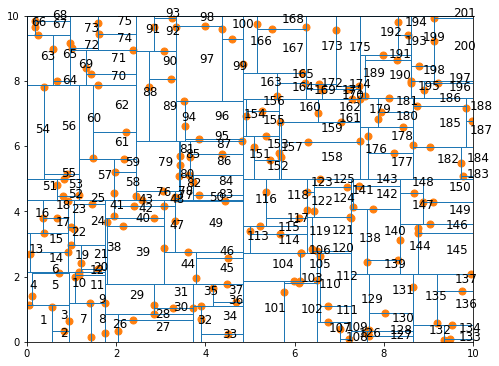

In [13]:
# create list with blocks
First_Block = block(vertices = np.array([[0,0],[10,10]]), 
                    elements = X, 
                    stats = range(1,N+2))

Blocks_List = [First_Block]

for i in range(N):
    # search the last block that has the K[i] stat
    for j in range(len(Blocks_List)):
        if (K[i] in Blocks_List[j].stats and Blocks_List[j].leftChild == None):
            Blocks_List[j].split(axis = H[K[i]-1], korder = K[i])
            Blocks_List.extend([Blocks_List[j].leftChild, Blocks_List[j].rightChild])            
            break

# plot
fig = plt.figure(figsize=(8,6))
plt.plot(X[:,0], X[:,1], 'o', color = 'C1', ms = 7)

plt.xlim(0,10)
plt.ylim(0,10)
block_ref = list()
for j in range(len(Blocks_List)):
    if Blocks_List[j].leftChild == None:
        Blocks_List[j].plot(print_num = True)

In [18]:
np.random.seed(9)
mean = np.array([0,0])
cov = np.array([[10,0.6],[0.6,10]])
N = 200
X = np.random.multivariate_normal(mean, cov, N)
# each cutting function is arbitrary along the X axis (vertical, 0) or the Y axis (horizontal, 1)

lim_inf = np.floor(X.min(axis=0)-X.std(axis=0))[0]
lim_max = np.ceil(X.max(axis=0)+X.std(axis=0))[0]

# each function is arbitrary and takes one of the components of the corresponding (x1, x2)
# H = np.array([1,1,0,1,1,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1])
H = np.random.randint(0, 2, N)

# define the permutaions (arbitrary)
# K = np.array([10, 5, 15, 3, 7, 12, 18, 2, 4, 6, 8, 11, 13, 16, 19, 1, 9, 14, 17, 20])
K = np.arange(1,N+1)
np.random.shuffle(K)

# we are going to order K and H in a diadic way
new_K = []
new_H = H
k_first = list(K)
k_first.sort()   # sort the list
K_List = [k_first]
K_marker = [0]  # index that says if the corresponding K_List has been partitioned or not

H_counter = []   # counter to asign values of H
h = 0
while sum(H_counter) <= len(new_H):
    H_counter.append(2**h)
    h = h+1
    
H_value = [0]*len(H_counter)    # values of H to asign
for i in range(len(H_value)):
    if i%2 == 1:
        H_value[i] = 1

for i in range(N):
    # choose list to divide
    for j in range(len(K_List)):
        if K_marker[j] == 0 and len(K_List[j]) >= 1:
            length_K = len(K_List[j])
            # choose position of new_K in the list
            K_position = (length_K+1)//2 - 1   # the middle (even) or the first integer greater than the middle (odd)
            new_K.append(K_List[j][K_position])
            # split the existing array            
            K_List.append(K_List[j][:K_position])
            K_List.append(K_List[j][K_position+1:])
            K_marker[j] = 1
            K_marker.append(0)
            K_marker.append(0)
            break
print(H_value, H_counter)
# for each element in K, asign the corresponding element in H

for i in range(N):
    for m in range(len(H_value)):
        if i+1 <= sum(H_counter[:m+1]):
            new_H[new_K[i]-1] = H_value[m]
            break
    
H = np.array(new_H)
K = np.array(new_K)
#np.random.shuffle(H)
#np.random.shuffle(K)
print(H[K-1])
print(K)


[0, 1, 0, 1, 0, 1, 0, 1] [1, 2, 4, 8, 16, 32, 64, 128]
[0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[100  50 150  25  75 125 175  12  37  62  87 112 137 162 188   6  18  31
  43  56  68  81  93 106 118 131 143 156 168 181 194   3   9  15  21  28
  34  40  46  53  59  65  71  78  84  90  96 103 109 115 121 128 134 140
 146 153 159 165 171 178 184 191 197   1   4   7  10  13  16  19  23  26
  29  32  35  38  41  44  48  51  54  57  60  63  66  69  73  76  79  82
  85  88  91  94  98 101 104 107 110 113 116 119 123 126 129 132 135 138
 141 144 148 151 154 157 160 163 166 169 173 176 179 182 186 189 192 195
 199   2   5   8  11  14  1

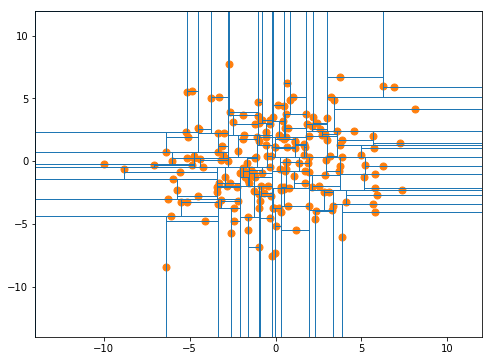

In [19]:
# create list with blocks
First_Block = block(vertices = np.array([[lim_inf,lim_inf],[lim_max,lim_max]]), 
                    elements = X, 
                    stats = range(1,N+2))

Blocks_List = [First_Block]

for i in range(N):
    # search the last block that has the K[i] stat
    for j in range(len(Blocks_List)):
        if (K[i] in Blocks_List[j].stats and Blocks_List[j].leftChild == None):
            Blocks_List[j].split(axis = H[K[i]-1], korder = K[i])
            Blocks_List.extend([Blocks_List[j].leftChild, Blocks_List[j].rightChild])            
            break

# plot
fig = plt.figure(figsize=(8,6))
plt.plot(X[:,0], X[:,1], 'o', color = 'C1', ms = 7)

plt.xlim(lim_inf,lim_max)
plt.ylim(lim_inf,lim_max)
block_ref = list()
for j in range(len(Blocks_List)):
    if Blocks_List[j].leftChild == None:
        Blocks_List[j].plot(print_num = False)